# Generador de datos

En este notebook se muestra la generación de datos aleatorios, pseudoaleatorios y 
de calendario. Para explorar más sobre la generación de fechas, explorarar su documentación.
https://docs.python.org/es/3/library/datetime.html
    

In [2]:
import pandas as pd
import numpy as np
import random
import datetime
import matplotlib.pyplot as plt   
import seaborn as sns

Parámetros iniciales

In [12]:
N = 100
valm, ds = 10, 1
fecha = []
list1 = []
list2 = []
items = ["ref_A", "ref_B", "ref_C"]
start_date = datetime.date(2022, 1, 1)
end_date = datetime.date(2022, 12, 31)
dt = end_date - start_date
days_between_dates = dt.days

## 1. Generación de datos y fechas pseudo-aleatorios

In [13]:
for i in range(N):
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start_date + datetime.timedelta(days=random_number_of_days)
    fecha.append(random_date)
    list1.append(random.gauss(valm, ds))
    list2.append(random.choice(items))

In [14]:
datos = pd.DataFrame({"Datos":list1, "Referencia":list2, "Fecha":fecha})
datos.to_excel('datos-simples.xlsx', sheet_name='fecha')

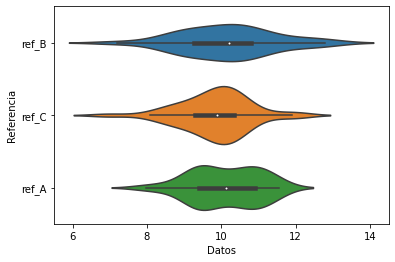

In [15]:
sns.violinplot(data=datos, x="Datos", y="Referencia")
plt.show()

## 2. Generación de datos igualmente espaciados

In [26]:
# inicializamos datos
test_date = datetime.datetime.strptime("01-7-2022", "%d-%m-%Y")
 
# Definimos el periodo
T= 10

# Generamos T datos
date_generated = pd.date_range(test_date, periods=T)

data2 = pd.DataFrame({"Fecha":date_generated})
data2.to_excel('data2.xlsx', sheet_name='fecha')

In [27]:
valores = []
for i in range(T):
    valores.append(random.gauss(10, 1))
data2["Valor"] = valores
data2

,Fecha,Valor
0,2022-07-01,9.523497
1,2022-07-02,9.859961
2,2022-07-03,10.027556
3,2022-07-04,10.218455
4,2022-07-05,10.544397
5,2022-07-06,10.264894
6,2022-07-07,8.992574
7,2022-07-08,9.143789
8,2022-07-09,10.495350
9,2022-07-10,9.233436


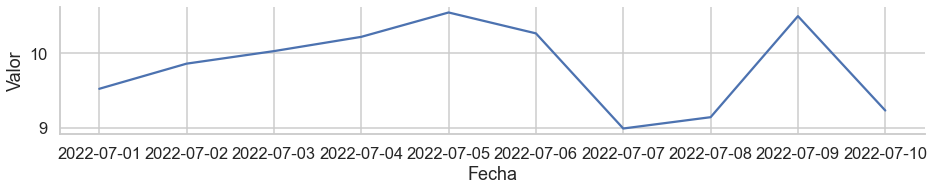

In [28]:
sns.set_theme(style="whitegrid", context="talk")
sns.relplot(data=data2,
           x="Fecha",
           y="Valor", 
            kind ="line", 
            height=3, 
            aspect=4.5)
plt.show()

## 3. Generador de datos de dos variables correlacionadas

Supongamos una correlación lineal de la forma $y=mx+b$.


In [43]:
N = 100
m, b = 1.5, 5
f = lambda x: m*x+b
x = []
y = []
for i in range(N):
    r = random.gauss(500, 100)
    x.append(round(r, 2))
    y.append(round(random.gauss(f(r), 80), 2))


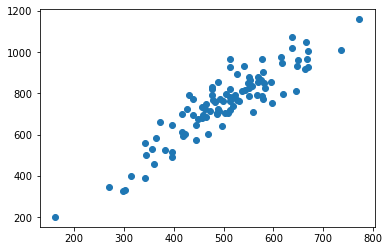

In [44]:
plt.scatter(x, y)
plt.show()

In [45]:
datos3 = pd.DataFrame({"Valores_x":x, "Valores_y":y})
datos3.to_excel('datos_3.xlsx', sheet_name='Datos_3')
datos3

,Valores_x,Valores_y
0,456.83,736.30
1,550.94,786.90
2,509.33,707.36
3,298.26,327.72
4,644.72,813.15
...,...,...
95,670.37,925.63
96,505.83,795.77
97,579.72,774.33
98,344.19,500.13
